# Vertebral Column Data Set

Name: Sunay Sanghani
USC ID: 5373536322
Github username: sunaysanghani

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os
import seaborn as sns
import numpy as np

# 1a. Load the Dataset

In [ ]:
filepath="C:/Users/sunay/Downloads/DSCI552HW1/data/vertebral_column_data/column_2C.dat"
NAMES = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
         "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "label"]
pwd = os.getcwd()
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(filepath, header=None, delimiter=" ", names=NAMES)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


# 1b. i. Scatterplots of the independent variables

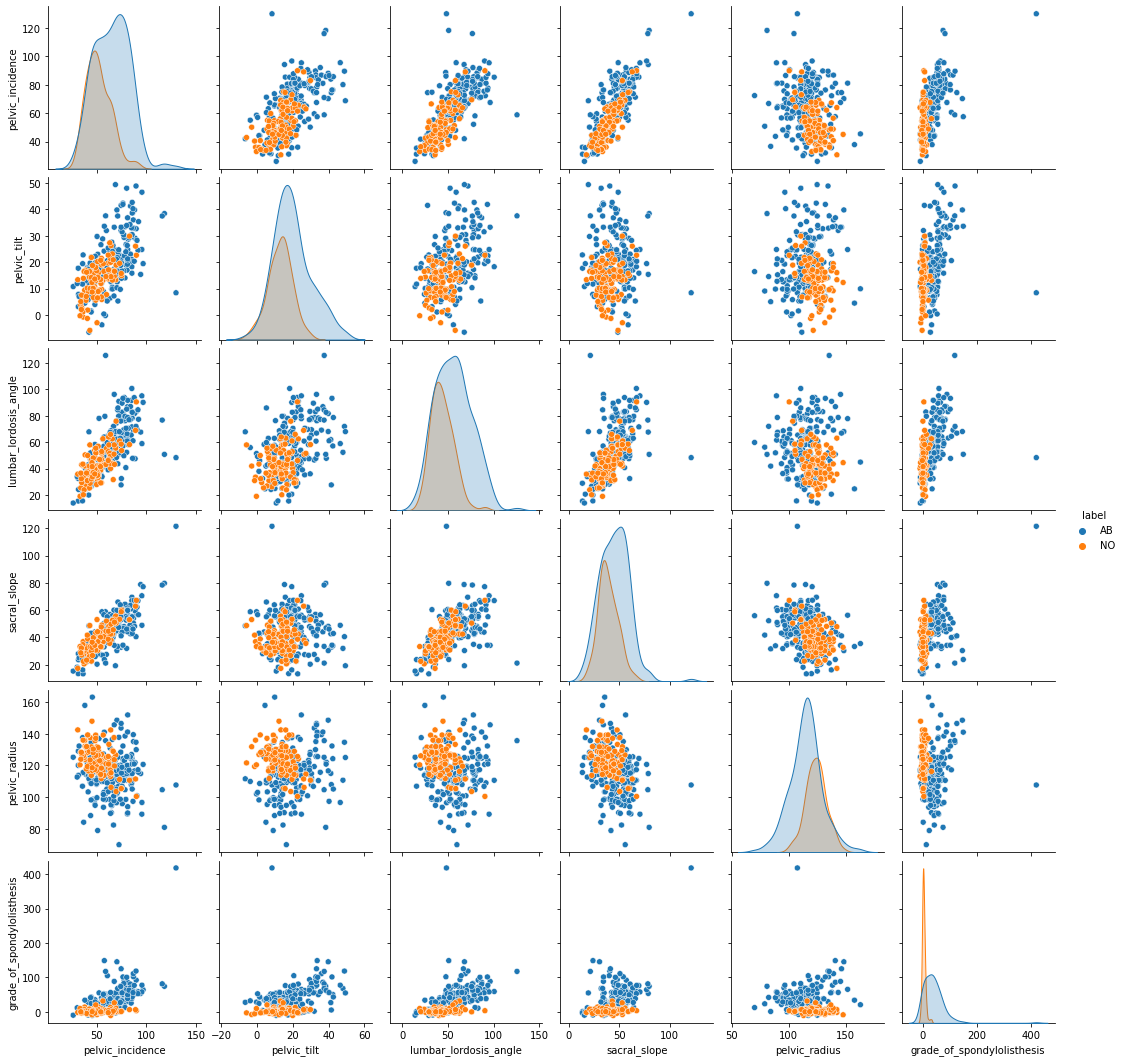

In [31]:
sns.pairplot(data=df, hue='label')

1b.

In [32]:
df.label.replace(['AB', 'NO'], [1, 0], inplace=True)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


# 1b. ii Make boxplots

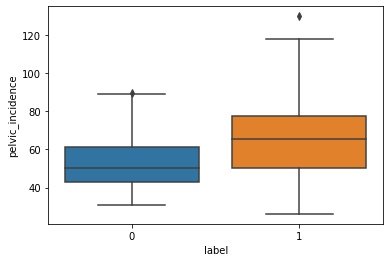

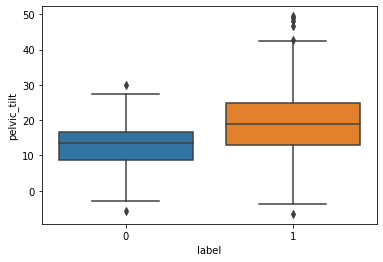

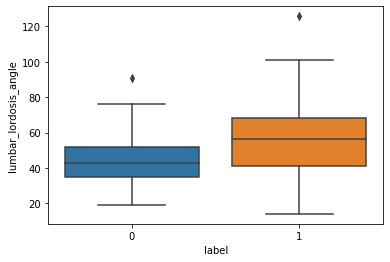

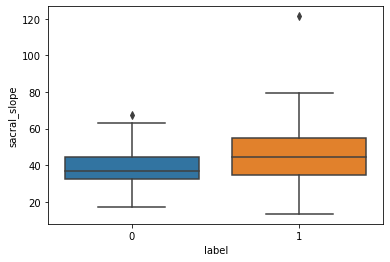

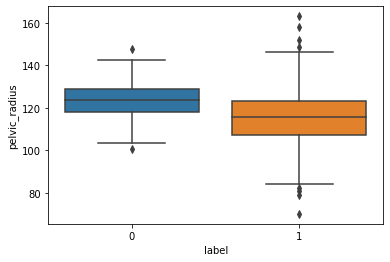

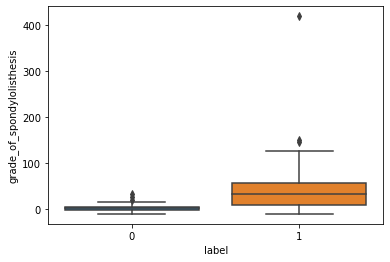

In [33]:
for i in range(0, len(df.columns)-1):
    sns.boxplot(data=df, x='label', y=df.columns[i])
    plt.show()

# 1b. iii. Select first 70 rows for training and 140 rows for test

In [34]:
training_set = pd.concat([df[df["label"] == 0].iloc[0:70, :], df[df["label"] == 1].iloc[0:140, :]])
test_set = pd.concat([df[df["label"] == 0].iloc[70:, :], df[df["label"] == 1].iloc[140:, :]])

# 1c. i. KNN on Vertebral Column Data Set with Euclidean

In [35]:
X_train = training_set.drop(columns='label')
y_train = training_set['label']
X_test = test_set.drop(columns='label')
y_test = test_set['label']

classifier = KNeighborsClassifier(n_neighbors = 15, p=2, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

# 1c iii. KNN, Confidence Matrix, and Graph

In [36]:
best_k = 0
best_accuracy = 0

training_error_list = []
test_error_list = []
min_error = float("inf")
for k in range(208,1,-3):
    classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    classifier.fit(X_train, y_train)
    training_error = 1 - accuracy_score(y_train, classifier.predict(X_train))
    test_error = 1 - accuracy_score(y_test, classifier.predict(X_test))
    training_error_list.append(training_error)
    
    if test_error < min_error:
        min_error = test_error
        best_k = k
    test_error_list.append(test_error)

print(f"The best k value is {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
print("The best k among the k values (208, 205, 202,...7, 4, 1)")
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive_rate = recall_score(y_test, y_pred)
true_negative_rate = (conf_matrix[0,0]) / (conf_matrix[0,0] + conf_matrix[0,1])
precision = (conf_matrix[1,1]) / ((conf_matrix[1,1]) + (conf_matrix[0,1]))
f1 = f1_score(y_test, y_pred)
print("Confusion Matrix")
print(conf_matrix)
print(f"True positive rate: {true_positive_rate}")
print(f"True negative rate: {true_negative_rate}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

The best k value is 4
The best k among the k values (208, 205, 202,...7, 4, 1)
Confusion Matrix
[[25  5]
 [ 1 69]]
True positive rate: 0.9857142857142858
True negative rate: 0.8333333333333334
Precision: 0.9324324324324325
F1 Score: 0.9583333333333333


The ideal K Value is listed above at 4 and confusion matrix

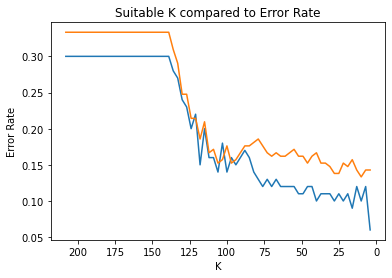

In [37]:
x = range(208,1,-3)
plt.plot(x, test_error_list, label="testing error")
plt.plot(x, training_error_list, label="training error")
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Error Rate")
plt.title("Suitable K compared to Error Rate")
plt.gca().invert_xaxis()

# 1c. iii. N/3 and N - (N/3) and plotting best test error rate for Learning Curve

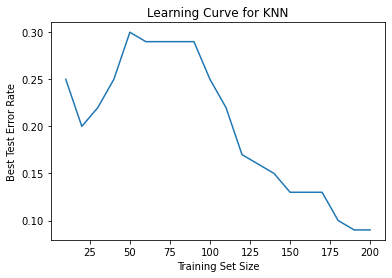

In [38]:
best_ks = []
best_test_errors = []
train_sizes = []
for n in range(10,210,10):
    classes_sample_0 = n//3
    classes_sample_1 = n - classes_sample_0
    truncated_training_set = pd.concat([training_set[training_set["label"] == 0].iloc[0:classes_sample_0, :], 
                                       training_set[training_set["label"] == 1].iloc[0:classes_sample_1, :]])
    
    subset_X_train = truncated_training_set.iloc[:, 0:(len(df.columns) - 1)].values
    subset_y_train = truncated_training_set.iloc[:, (len(df.columns) - 1)].values
    
    best_test_error = float("inf")
    best_k = 0
    
    for k in range(1, n, 5):
        classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        classifier.fit(subset_X_train, subset_y_train)
        
        y_pred = classifier.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)
        
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k
    train_sizes.append(n)
    best_test_errors.append(best_test_error)
    best_ks.append(best_k)
plt.plot(train_sizes, best_test_errors, linestyle="-")
plt.title("Learning Curve for KNN")
plt.xlabel("Training Set Size")
plt.ylabel("Best Test Error Rate")
plt.show()

# 1d. i. Minkowski Distance, using a helper method to evaluate how to optimize usage of different metrics at hand

The method below is a helper method which will take in the training and test data and output the test errors from the metric.

In [39]:
def helper_method_knn(training_set, test_set, p, k, metric_type, weight):
    X_train = training_set.iloc[:, 0:(len(df.columns) - 1)].values
    y_train = training_set.iloc[:, (len(df.columns) - 1)].values
    
    X_test = test_set.iloc[:, 0:(len(df.columns) - 1)].values
    y_test = test_set.iloc[:, (len(df.columns) - 1)].values
    if metric_type == "mahalanobis":
        options = {"VI" : np.linalg.pinv(np.cov(X_train, rowvar=False))}
    else:
        options = None
        
    k_errors = {}
    for val in k:
        classifier = KNeighborsClassifier(n_neighbors=val, p=p, metric=metric_type, weights=weight,metric_params=options)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        testing_error = 1 - accuracy_score(y_test, y_pred)
        k_errors[val] = round(testing_error, 2)
    return k_errors

In [40]:
errors_minkowski = helper_method_knn(training_set, test_set, 1, range(1,200,5), "minkowski", "uniform")
errors_minkowski
get_min_error(errors_minkowski)

,Optimal K Values,Corresponding Minimum Test Errors
0,6,0.11
1,11,0.11
2,26,0.11


# 1d. ii. A. Manhattan Distance where p=1

In [41]:
errors_manhattan = helper_method_knn(training_set, test_set, 1, range(1,200,5), "manhattan", "uniform")
headers = ["Optimal K Values", "Corresponding Minimum Test Errors"]

def get_min_error(errors_dict):
    sorted_dict = sorted(errors_dict, key=errors_dict.get)
    min_error = min(errors_dict.values())
    min_error_rows = []
    for key, value in errors_dict.items():
        if errors_dict[key] == min_error:
            #min_error_rows.append(["Optimal K-Value: " + str(key), "Minimum Test Error: " + str(value)])
            min_error_rows.append([str(key), str(value)])
    
    df1 = pd.DataFrame(min_error_rows, columns=headers)
    return df1
get_min_error(errors_manhattan)

,Optimal K Values,Corresponding Minimum Test Errors
0,6,0.11
1,11,0.11
2,26,0.11


The values of k that provide minimum test errors are 6, 11, 26 with an error of 0.11. K optimal is k=6.

# 1d. i. B. log(p)

In [42]:
def helper_method_knn_minkowski(training_set, test_set, p_values):
    X_train = training_set.iloc[:, 0:(len(df.columns) - 1)].values
    y_train = training_set.iloc[:, (len(df.columns) - 1)].values
    
    X_test = test_set.iloc[:, 0:(len(df.columns) - 1)].values
    y_test = test_set.iloc[:, (len(df.columns) - 1)].values
    
    test_errors_p = []
    for p in p_values:
        classifier = KNeighborsClassifier(n_neighbors=6, p=p, metric="minkowski")
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        testing_error = 1 - accuracy_score(y_test, y_pred)
        test_errors_p.append(testing_error)
    return {
        "P": p_values, 
        "log10(p)": np.linspace(0.1,1,10), 
        "test_error_list": test_errors_p
    }

In [43]:
p_vals_analysis = helper_method_knn_minkowski(training_set, test_set, np.logspace(0.1,1,10))
df_p = pd.DataFrame(p_vals_analysis)
df_p

,P,log10(p),test_error_list
0,1.258925,0.1,0.09
1,1.584893,0.2,0.09
2,1.995262,0.3,0.08
3,2.511886,0.4,0.08
4,3.162278,0.5,0.08
5,3.981072,0.6,0.06
6,5.011872,0.7,0.07
7,6.309573,0.8,0.08
8,7.943282,0.9,0.09
9,10.000000,1.0,0.09


In [44]:
min_test_error = df_p["test_error_list"].min()
df_p[df_p["test_error_list"] == min_test_error]

,P,log10(p),test_error_list
5,3.981072,0.6,0.06


# 1d. i. C. Chebyshev Distance with p

In [45]:
errors_chebyshev = helper_method_knn(training_set, test_set, 1, range(1,200,5), "chebyshev", "uniform")
errors_chebyshev
get_min_error(errors_chebyshev)

,Optimal K Values,Corresponding Minimum Test Errors
0,16,0.08


# 1d. ii. Mahalanobis Distance

In [46]:
errors_mahalanobis = helper_method_knn(training_set, test_set, 2, range(1,200,5), "mahalanobis", "uniform")
errors_mahalanobis
get_min_error(errors_mahalanobis)

,Optimal K Values,Corresponding Minimum Test Errors
0,1,0.17
1,6,0.17


# 1e. Weighted Analysis

In [47]:
def knn_analysis():
    metrics = ["euclidean", "manhattan", "chebyshev","mahalanobis"]
    for metric in metrics:
        metric_data = helper_method_knn(training_set, test_set, 1, range(1,200,5), metric, "uniform")
        table = get_min_error(metric_data)
        print("Analysis for " + metric)
        print(table)

def weighted_knn_analysis():
    metrics = ["euclidean", "manhattan", "chebyshev","mahalanobis"]
    for metric in metrics:
        metric_data = helper_method_knn(training_set, test_set, 1, range(1,200,5), metric, 'distance')
        table = get_min_error(metric_data)
        print("Analysis for " + metric)
        print(table)

In [48]:
knn_analysis()

Analysis for euclidean
  Optimal K Values Corresponding Minimum Test Errors
0                6                              0.08
Analysis for manhattan
  Optimal K Values Corresponding Minimum Test Errors
0                6                              0.11
1               11                              0.11
2               26                              0.11
Analysis for chebyshev
  Optimal K Values Corresponding Minimum Test Errors
0               16                              0.08
Analysis for mahalanobis
  Optimal K Values Corresponding Minimum Test Errors
0                1                              0.17
1                6                              0.17


In [49]:
weighted_knn_analysis()

Analysis for euclidean
  Optimal K Values Corresponding Minimum Test Errors
0                6                               0.1
Analysis for manhattan
  Optimal K Values Corresponding Minimum Test Errors
0               26                               0.1
Analysis for chebyshev
  Optimal K Values Corresponding Minimum Test Errors
0               16                              0.11
1               31                              0.11
2               36                              0.11
3               41                              0.11
4               61                              0.11
Analysis for mahalanobis
  Optimal K Values Corresponding Minimum Test Errors
0                1                              0.17


# 1f. Lowest Training Error

The lowest training error rate I achieved in this HW is 0.